# Import the necessary libraries

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

# Configure logging
logging.basicConfig(filename='../logs/',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_csv_data import Load_CSV_Data


# Load the data sets

In [2]:
df = Load_CSV_Data('../data/cleaned_Copy of BrentOilPrices.csv')
df.load_csv_data()
df = df.get_data()

df_gdp_long = Load_CSV_Data('../data/gdp/cleaned_gdp_data.csv')
df_gdp_long.load_csv_data()
df_gdp_long = df_gdp_long.get_data()

df_inflation_long = Load_CSV_Data('../data/inflation/cleaned_inflation_data.csv')
df_inflation_long.load_csv_data()
df_inflation_long = df_inflation_long.get_data()

df_exrate_long = Load_CSV_Data('../data/exchange_rate/cleaned_exchange_rate_data.csv')
df_exrate_long.load_csv_data()
df_exrate_long = df_exrate_long.get_data()

Data successfully loaded from ../data/cleaned_Copy of BrentOilPrices.csv
Data successfully loaded from ../data/gdp/cleaned_gdp_data.csv
Data successfully loaded from ../data/inflation/cleaned_inflation_data.csv
Data successfully loaded from ../data/exchange_rate/cleaned_exchange_rate_data.csv


In [3]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
df_gdp_long.head()

,Country,CountryCode,GDP_Indicator,Indicator Code,Year,GDP
0,Aruba,ABW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1987,1.790000e+00
1,Afghanistan,AFG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1987,3.927643e+01
2,Angola,AGO,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1987,2.990000e-08
3,United Arab Emirates,ARE,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1987,3.671000e+00
4,Argentina,ARG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1987,2.144300e-04


In [5]:
df_inflation_long.head()

,Country,CountryCode,Inflation_Indicator,Indicator Code,Year,Inflation
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1987,4.877095e+08
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1987,1.858120e+11
2,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1987,1.122950e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1987,2.080796e+09
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1987,6.112999e+08


In [6]:
df_exrate_long.head()

,Country,CountryCode,ExchangeRate_Indicator,Indicator Code,Year,Exchange_Rate
0,Aruba,ABW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1987,3.591970
1,Africa Eastern and Southern,AFE,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1987,12.694070
2,Africa Western and Central,AFW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1987,2.356512
3,Angola,AGO,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1987,9.823311
4,Albania,ALB,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1987,-0.000306


# Merge the data set

In [7]:
# Step 1: Add 'Year' column to the Brent oil data
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Step 2: Confirm that the 'Year' column is added
print("Brent Oil Data with Year Column:")
print(df.head())

# Step 3: Select necessary columns and rename others in each dataframe
df_gdp_long = df_gdp_long[['Year', 'Country', 'CountryCode', 'GDP']].rename(columns={'GDP': 'GDP_Value'})
df_inflation_long = df_inflation_long[['Year', 'Country', 'CountryCode', 'Inflation']].rename(columns={'Inflation': 'Inflation_Rate'})
df_exrate_long = df_exrate_long[['Year', 'Country', 'CountryCode', 'Exchange_Rate']].rename(columns={'Exchange_Rate': 'ExRate_Value'})

# Step 4: Merge the dataframes on 'Year', 'Country', and 'CountryCode'
merged_data = pd.merge(df, df_gdp_long, on='Year', how='left')
merged_data = pd.merge(merged_data, df_inflation_long, on=['Year', 'Country', 'CountryCode'], how='left')
merged_data = pd.merge(merged_data, df_exrate_long, on=['Year', 'Country', 'CountryCode'], how='left')

# Step 5: Display the merged data to verify the result
print("Merged Data:")
print(merged_data.head())
merged_data.to_csv('../data/merged_brent_oil_data.csv', index=False)



Brent Oil Data with Year Column:
         Date  Price    Year
0  1987-05-20  18.63  1987.0
1  1987-05-21  18.45  1987.0
2  1987-05-22  18.55  1987.0
3  1987-05-25  18.60  1987.0
4  1987-05-26  18.63  1987.0
Merged Data:
         Date  Price    Year               Country CountryCode     GDP_Value  \
0  1987-05-20  18.63  1987.0                 Aruba         ABW  1.790000e+00   
1  1987-05-20  18.63  1987.0           Afghanistan         AFG  3.927643e+01   
2  1987-05-20  18.63  1987.0                Angola         AGO  2.990000e-08   
3  1987-05-20  18.63  1987.0  United Arab Emirates         ARE  3.671000e+00   
4  1987-05-20  18.63  1987.0             Argentina         ARG  2.144300e-04   

   Inflation_Rate  ExRate_Value  
0    4.877095e+08      3.591970  
1             NaN           NaN  
2             NaN      9.823311  
3    3.638491e+10      3.685585  
4    1.090290e+11    127.539918  


In [8]:
merged_data.head()

,Date,Price,Year,Country,CountryCode,GDP_Value,Inflation_Rate,ExRate_Value
0,1987-05-20,18.63,1987.0,Aruba,ABW,1.790000e+00,4.877095e+08,3.591970
1,1987-05-20,18.63,1987.0,Afghanistan,AFG,3.927643e+01,NaN,NaN
2,1987-05-20,18.63,1987.0,Angola,AGO,2.990000e-08,NaN,9.823311
3,1987-05-20,18.63,1987.0,United Arab Emirates,ARE,3.671000e+00,3.638491e+10,3.685585
4,1987-05-20,18.63,1987.0,Argentina,ARG,2.144300e-04,1.090290e+11,127.539918


# Summary

In [9]:
# Display summary statistics for numerical columns
merged_data[['Price', 'GDP_Value', 'Inflation_Rate', 'ExRate_Value']].describe()


,Price,GDP_Value,Inflation_Rate,ExRate_Value
count,1.505466e+06,1.504815e+06,1.468937e+06,1.456572e+06
mean,4.650250e+01,1.130812e+06,2.743344e+11,3.346436e+01
std,3.255038e+01,8.716633e+07,1.369280e+12,4.493890e+02
min,9.100000e+00,3.750000e-10,2.101742e+07,-3.156591e+01
25%,1.878000e+01,1.943036e+00,2.690111e+09,1.933841e+00
50%,3.177000e+01,8.070470e+00,1.185703e+10,4.933130e+00
75%,6.712000e+01,1.218241e+02,7.369015e+10,1.088646e+01
max,1.439500e+02,6.723052e+09,2.152140e+13,2.676586e+04


# Data visualization

TypeError: 'value' must be an instance of str or bytes, not a float

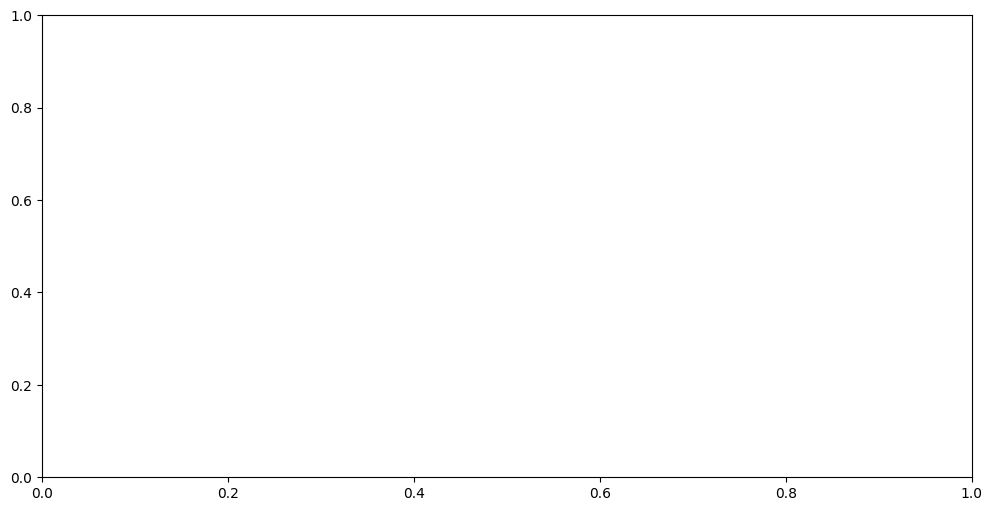

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for Brent Oil Prices over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### Scatter Plot for GDP vs. Brent Oil Prices

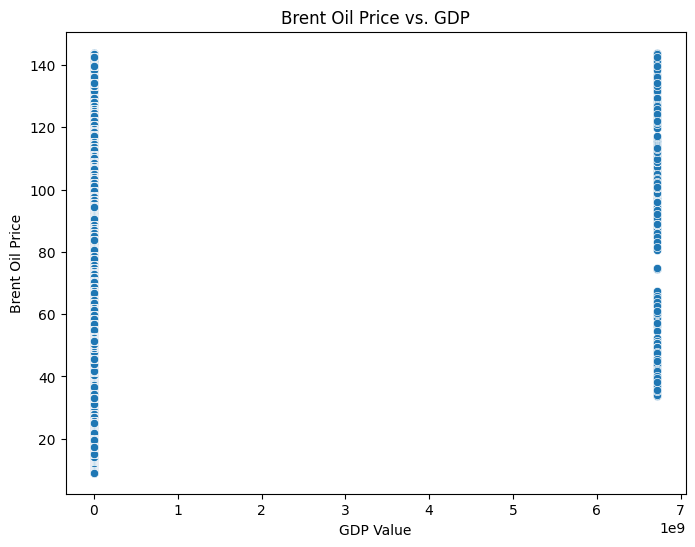

In [ ]:
# Scatter plot for GDP vs. Brent Oil Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_data['GDP_Value'], y=merged_data['Price'])
plt.title('Brent Oil Price vs. GDP')
plt.xlabel('GDP Value')
plt.ylabel('Brent Oil Price')
plt.show()


### Correlation Heatmap


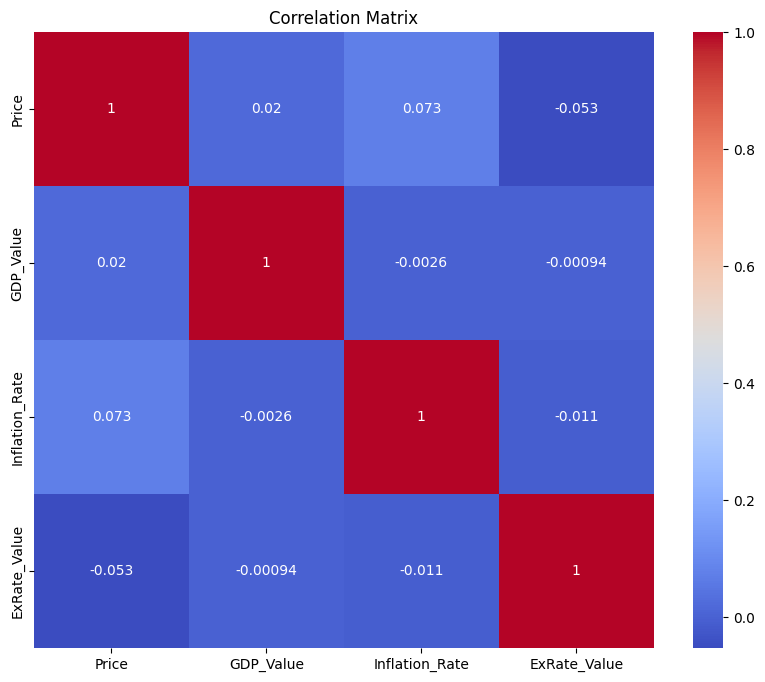

In [11]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[['Price', 'GDP_Value', 'Inflation_Rate', 'ExRate_Value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Handling Missing Values


In [12]:
# Check for missing values before handling
missing_values_before = merged_data.isnull().sum()
print("Missing values before handling:\n", missing_values_before)

# Handling missing values
# Forward fill for Inflation_Rate and ExRate_Value
merged_data[['Inflation_Rate', 'ExRate_Value']] = merged_data[['Inflation_Rate', 'ExRate_Value']].fillna(method='ffill')

# Check for missing values after handling
missing_data = merged_data.isnull().sum()
print("Missing values after handling:\n", missing_data)


Missing values before handling:
 Date                651
Price                 0
Year                651
Country             651
CountryCode         651
GDP_Value           651
Inflation_Rate    36529
ExRate_Value      48894
dtype: int64
Missing values after handling:
 Date              651
Price               0
Year              651
Country           651
CountryCode       651
GDP_Value         651
Inflation_Rate      0
ExRate_Value        0
dtype: int64


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_29188\3045330808.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data[['Inflation_Rate', 'ExRate_Value']] = merged_data[['Inflation_Rate', 'ExRate_Value']].fillna(method='ffill')


# Outlier Detection


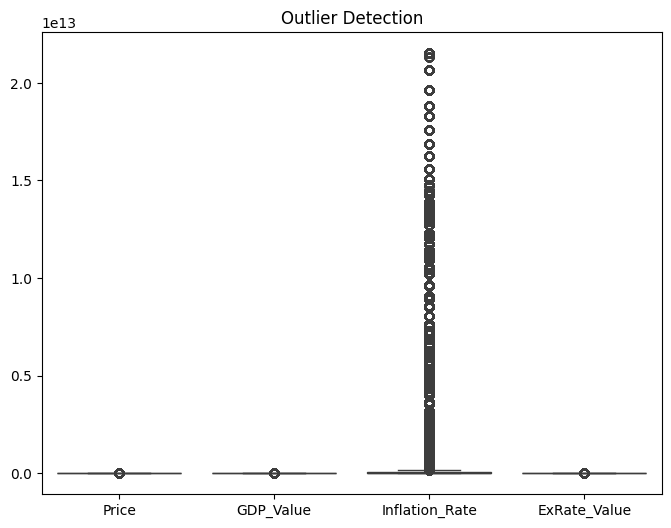

In [13]:
# Boxplot for detecting outliers in key variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data[['Price', 'GDP_Value', 'Inflation_Rate', 'ExRate_Value']])
plt.title('Outlier Detection')
plt.show()


In [14]:
merged_data.fillna(method='ffill', inplace=True)

merged_data.head()

C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_29188\2933130897.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


,Date,Price,Year,Country,CountryCode,GDP_Value,Inflation_Rate,ExRate_Value
0,1987-05-20,18.63,1987.0,Aruba,ABW,1.790000e+00,4.877095e+08,3.591970
1,1987-05-20,18.63,1987.0,Afghanistan,AFG,3.927643e+01,4.877095e+08,3.591970
2,1987-05-20,18.63,1987.0,Angola,AGO,2.990000e-08,4.877095e+08,9.823311
3,1987-05-20,18.63,1987.0,United Arab Emirates,ARE,3.671000e+00,3.638491e+10,3.685585
4,1987-05-20,18.63,1987.0,Argentina,ARG,2.144300e-04,1.090290e+11,127.539918


In [15]:
merged_data.to_csv('../data/cleaned_merged_brent_oil_data.csv', index=False)


# Model Building

### Vector Autoregression (VAR)

In [16]:
from statsmodels.tsa.api import VAR

# Fit a VAR model
model = VAR(merged_data[['Price', 'GDP_Value', 'Inflation_Rate', 'ExRate_Value']])
results = model.fit(maxlags=15, ic='aic')


### Random Forest Regressor


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode 'CountryCode' column
le = LabelEncoder()
merged_data['CountryCode'] = le.fit_transform(merged_data['CountryCode'])

# Define features and target
X = merged_data[['CountryCode', 'GDP_Value', 'Inflation_Rate', 'ExRate_Value']]
y = merged_data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 7.9508855673494345
Random Forest R-squared: 0.9403678855013035


c:\Users\wubeshet.abera\Projects\Ten-Academy\Brent-Oil-Price-Change-Analysis\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### LSTM Networks

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split for scaled data
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LSTM model definition
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test))

# Predictions and evaluation
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()
print("LSTM RMSE:", mean_squared_error(y_test, y_pred_lstm, squared=False))
print("LSTM R-squared:", r2_score(y_test, y_pred_lstm))


Epoch 1/10


c:\Users\wubeshet.abera\Projects\Ten-Academy\Brent-Oil-Price-Change-Analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18819/18819 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 1197.3102 - val_loss: 1025.5393
Epoch 2/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 1023.9591 - val_loss: 1011.7694
Epoch 3/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1011.6656 - val_loss: 1008.3296
Epoch 4/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 1003.4151 - val_loss: 994.0429
Epoch 5/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 992.8225 - val_loss: 982.8693
Epoch 6/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 982.4766 - val_loss: 973.7794
Epoch 7/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 970.0750 - val_loss: 960.6754
Epoch 8/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 959.7590 - val_loss: 955.9479
Epoch 9/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 951.3179 - val_loss: 945.0756
Epoch 10/10
18819/18819 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 941.9370 - val_loss: 933.0458
9410/9410 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
LSTM RMSE

c:\Users\wubeshet.abera\Projects\Ten-Academy\Brent-Oil-Price-Change-Analysis\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


: 